# StackOverflow Developer Survey 2019

## Introduction

This notebook will present an analysis of the StackOverflow Developer Survey 2019 (from now on called _Survey_). It will start with an overview about what has been asked and who the respondents are.

Later on, this analysis will try to answer the following questions about the survey:

* What is the correlation between a developers experience, education and their paycheck
* What languages do developers of different experience levels use

---

## 1. Overview

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.style as style

plt.rcParams["figure.figsize"] = (20,10)
style.use('seaborn-muted')

In [93]:
completeDataFrame = pd.read_csv('survey_results_public.csv', low_memory=False)

In [94]:
completeDataFrame["Respondent"].count()

98855

We can see here that 98855 people answered the survey.

In [95]:
list(completeDataFrame.columns)

['Respondent',
 'Hobby',
 'OpenSource',
 'Country',
 'Student',
 'Employment',
 'FormalEducation',
 'UndergradMajor',
 'CompanySize',
 'DevType',
 'YearsCoding',
 'YearsCodingProf',
 'JobSatisfaction',
 'CareerSatisfaction',
 'HopeFiveYears',
 'JobSearchStatus',
 'LastNewJob',
 'AssessJob1',
 'AssessJob2',
 'AssessJob3',
 'AssessJob4',
 'AssessJob5',
 'AssessJob6',
 'AssessJob7',
 'AssessJob8',
 'AssessJob9',
 'AssessJob10',
 'AssessBenefits1',
 'AssessBenefits2',
 'AssessBenefits3',
 'AssessBenefits4',
 'AssessBenefits5',
 'AssessBenefits6',
 'AssessBenefits7',
 'AssessBenefits8',
 'AssessBenefits9',
 'AssessBenefits10',
 'AssessBenefits11',
 'JobContactPriorities1',
 'JobContactPriorities2',
 'JobContactPriorities3',
 'JobContactPriorities4',
 'JobContactPriorities5',
 'JobEmailPriorities1',
 'JobEmailPriorities2',
 'JobEmailPriorities3',
 'JobEmailPriorities4',
 'JobEmailPriorities5',
 'JobEmailPriorities6',
 'JobEmailPriorities7',
 'UpdateCV',
 'Currency',
 'Salary',
 'SalaryType',

And they had 129 questions to answer. The `survey_results_schema.csv` file gives information about each question.

Let's reduce the number of columns to an interesting set.

In [96]:
dataFrame = completeDataFrame[[
    'Respondent', 
    'Hobby', 
    'OpenSource',
    'Country',
    'Student',
    'Employment',
    'FormalEducation',
    'UndergradMajor',
    'CompanySize',
    'DevType',
    'YearsCoding',
    'YearsCodingProf',
    'Currency',
    'Salary',
    'SalaryType',
    'ConvertedSalary',
    'CurrencySymbol',
    'Gender',
    'Age'
]]

In [97]:
dataFrame.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,Gender,Age
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,NaN,NaN,Monthly,NaN,KES,Male,25 - 34 years old
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,British pounds sterling (£),51000,Yearly,70841.0,GBP,Male,35 - 44 years old
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,6-8 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,18-20 years,12-14 years,U.S. dollars ($),NaN,NaN,NaN,NaN,Male,35 - 44 years old
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,0-2 years,South African rands (R),260000,Yearly,21426.0,ZAR,Male,18 - 24 years old


### Simple analysis

In this chapter we will look at a few survey questions and present a short analysis.

#### Employment & Hobby

Number of respondents who have answered this question: 95321


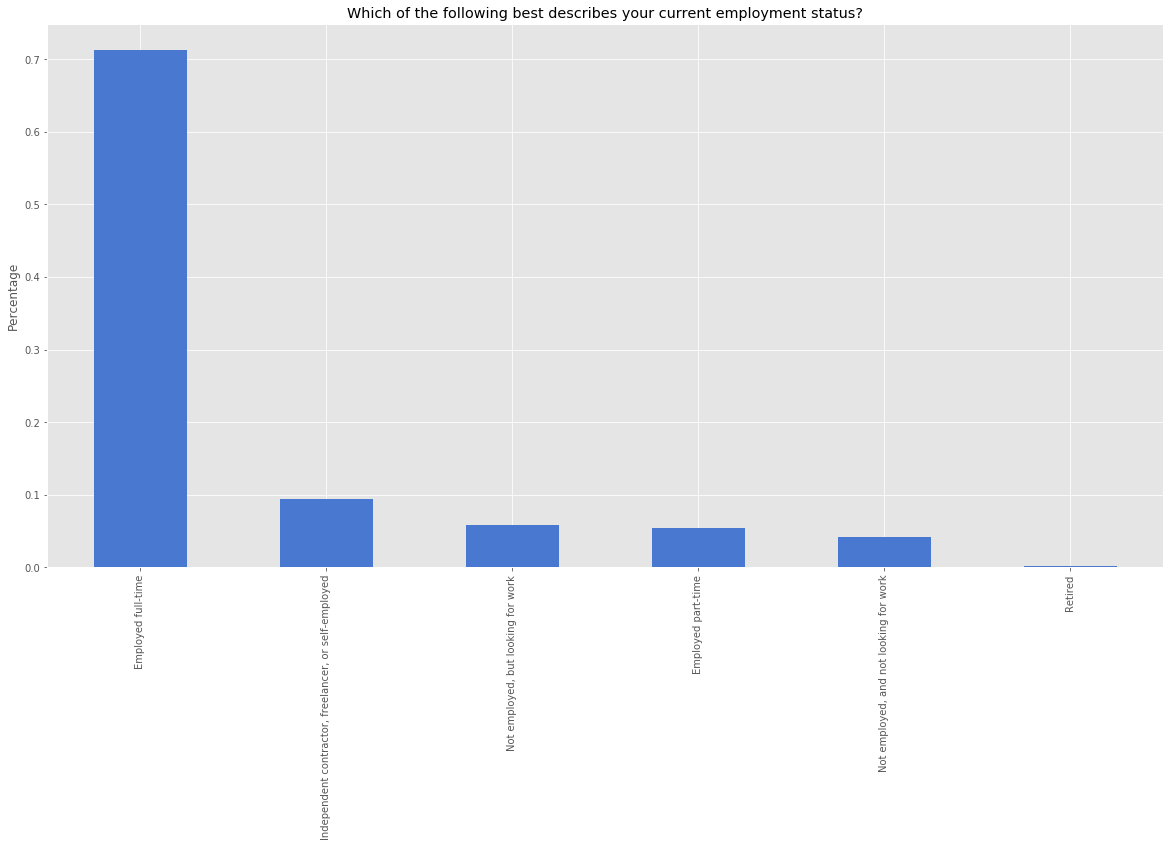

In [98]:
print('Number of respondents who have answered this question: {}'.format(len(dataFrame["Employment"][dataFrame["Employment"].notnull()])))

dataFrame["Employment"].value_counts().apply(lambda x: x / len(dataFrame)).plot(kind='bar')
plt.title("Which of the following best describes your current employment status?")
plt.ylabel("Percentage")
#plt.yscale('log')
plt.show()

Most of all respondents are employed full-time.

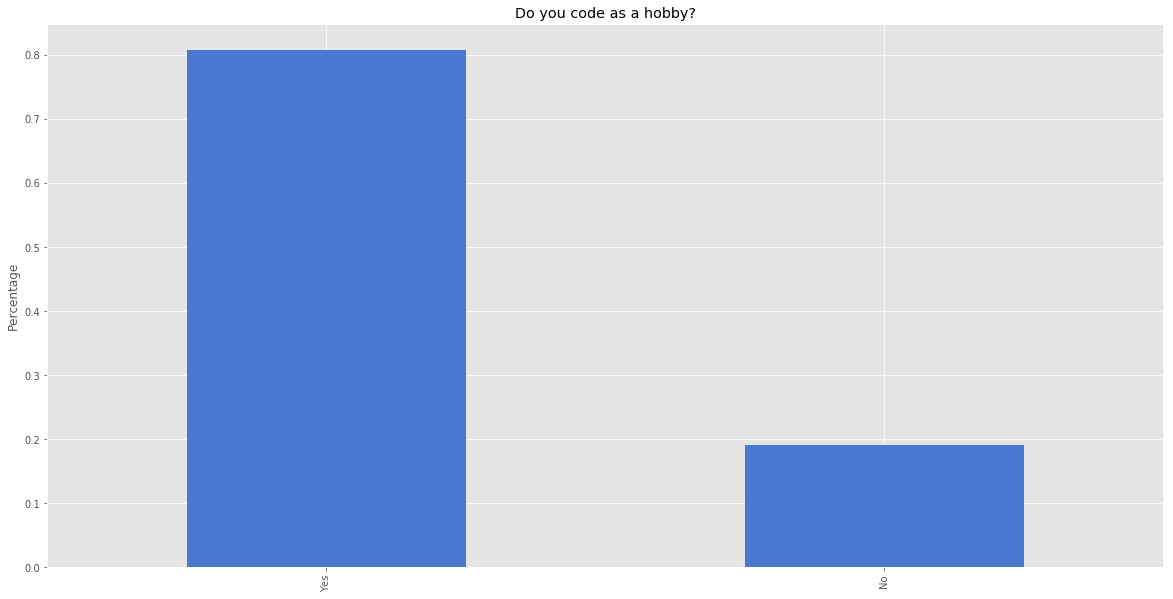

In [99]:
dataFrame["Hobby"].value_counts().apply(lambda x: x / len(dataFrame)).plot(kind='bar')
plt.title("Do you code as a hobby?")
plt.ylabel("Percentage")
plt.show()

We can see that about 80% of all respondents (also) see coding as their hobby.

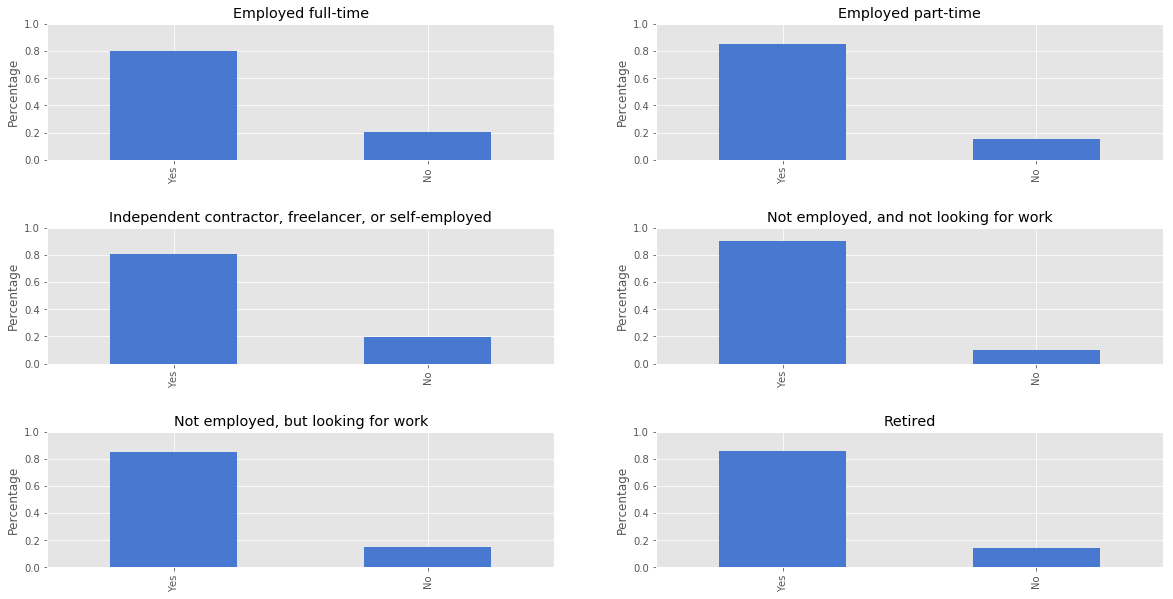

In [100]:
for i,c in enumerate(dataFrame["Employment"].astype('category').cat.categories):
    df = dataFrame[dataFrame.Employment == c]
    plt.subplot(3,2,i + 1)
    df["Hobby"].value_counts().apply(lambda x: x / len(df)).plot(kind='bar')
    plt.ylabel('Percentage')
    plt.ylim(0, 1)
    plt.title(c)
    plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()

This shows that about 80% of all developers see programming as their hobby regardless of employment. But the categories "Not employed, and not looking for work" and "Retired" has the highest number of hobbiest.

#### Gender

Respondents who have answered this question: 0.652157199939305


Text(0, 0.5, 'Percentage')

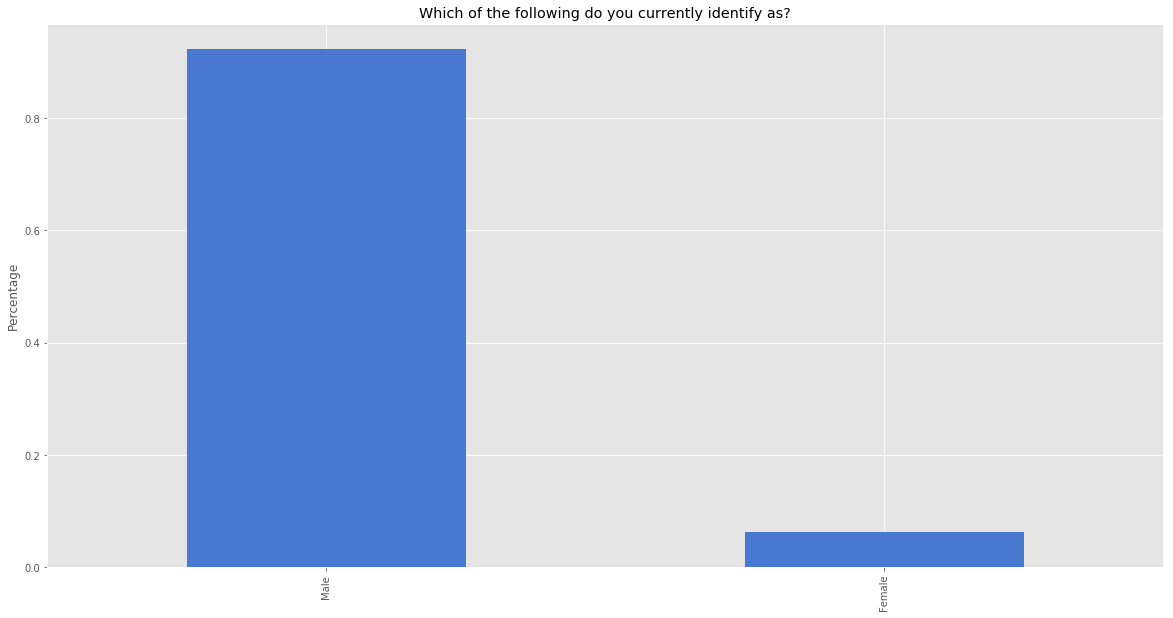

In [101]:
dgender = dataFrame["Gender"].dropna().astype('category')
print('Respondents who have answered this question: {}'.format(len(dgender) / len(dataFrame)))
dgenderRed = dgender
for c in dgender.cat.categories:
    if not c in ['Male', 'Female']:
        dgenderRed = dgenderRed.cat.remove_categories([c])
dgenderRed.value_counts().apply(lambda x: x / len(dgender)).plot(kind='bar')
dgenderRed.value_counts().apply(lambda x: x / len(dgender))
plt.title("Which of the following do you currently identify as?")
plt.ylabel("Percentage")

As expected, most respondents are male (92%). Only a very small percentage (~1.5%) identifie as neither male or female.

#### Country

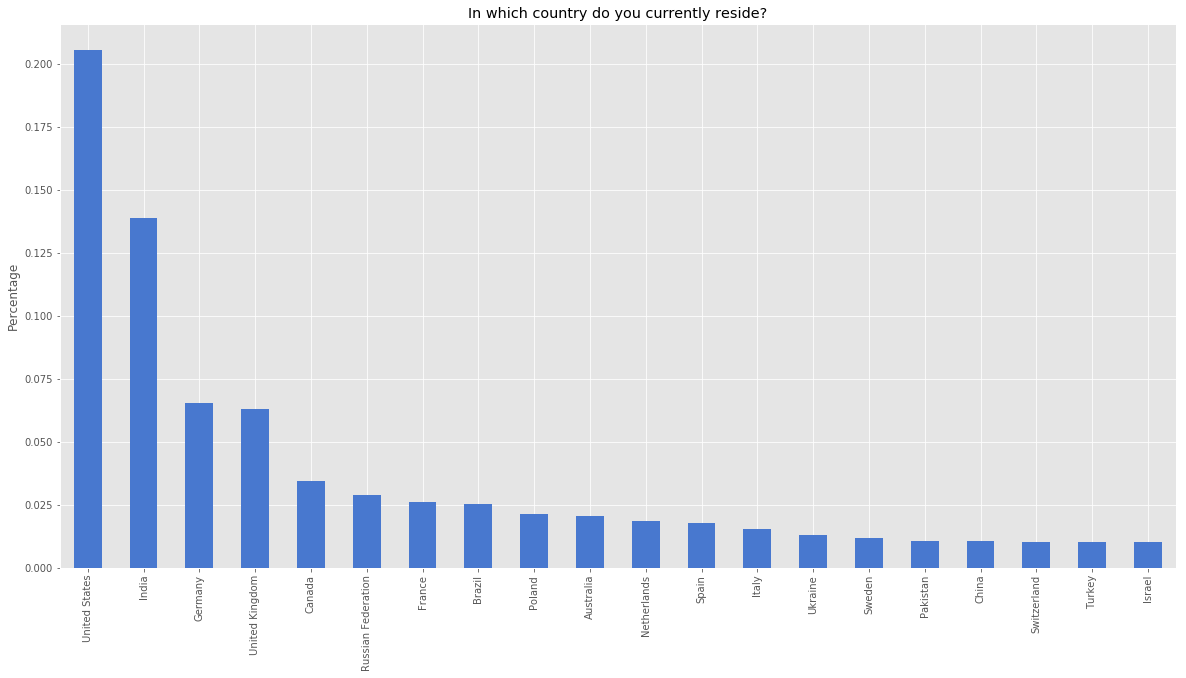

In [102]:
dCountryPerc = dataFrame["Country"].value_counts().apply(lambda x: x / len(dataFrame))
dCountryPerc[dCountryPerc > 0.01].plot(kind='bar')
plt.title("In which country do you currently reside?")
plt.ylabel("Percentage")
plt.show()

Most respondents reside inside the US, followed by India, Germany, UK and Canada.

Only looking at the top 5 countries we can compare respondents per capital:

Text(0.5, 1.0, 'Respondents per capital')

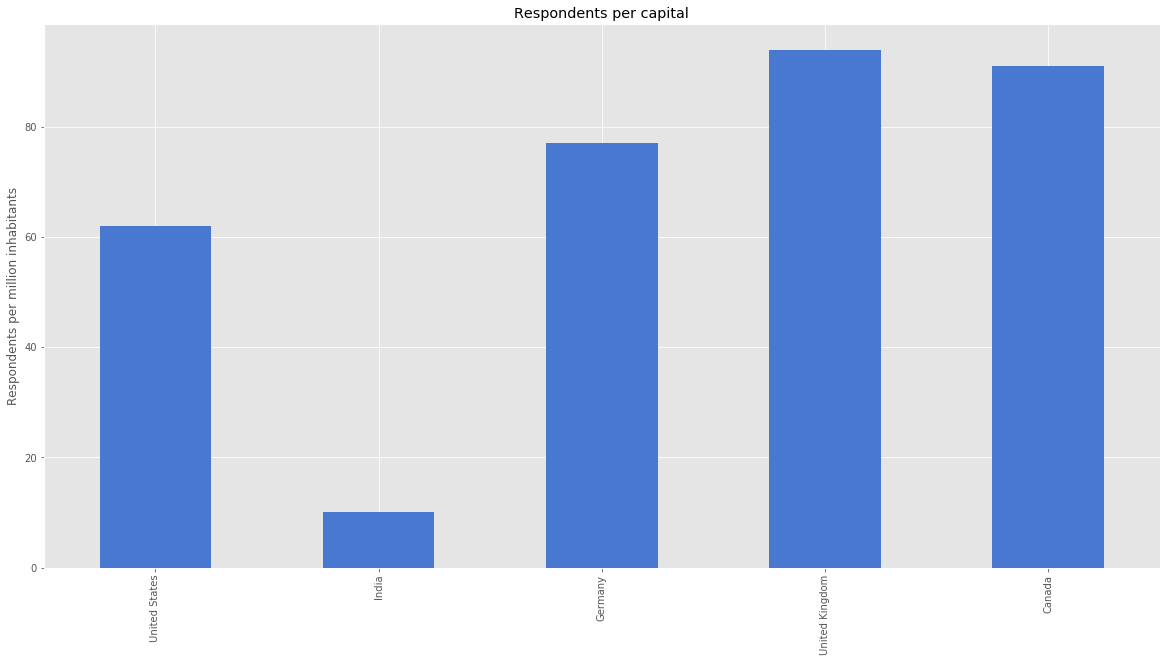

In [129]:
topCountries = {'United States': 327, 'India': 1339, 'Germany': 83, 'United Kingdom': 66, 'Canada': 37}

df = dataFrame['Country'].value_counts().head()
for name, v in df.iteritems():
    df[name] = v / topCountries[name]

df.plot(kind="bar")
plt.ylabel('Respondents per million inhabitants')
plt.title('Respondents per capital')